In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

rng = np.random.default_rng()

In [33]:
from mtt.simulator import Simulator
from mtt.data import OnlineDataset

init_simulator = lambda: Simulator(
    window=1000,
    width=2000,
    n_targets=10,
    target_lifetime=10,
    clutter_rate=10,
    p_detection=0.95,
    sigma_motion=0.5,
    sigma_initial_state=(1.0, 1.0),
    n_sensors=3,
    sensor_range=500,
    noise_range=10.0,
    noise_bearing=0.1,
    dt=1.0,
)
dataset = OnlineDataset(n_steps=100, sigma_position=0.01, length=20, img_size=128, init_simulator=init_simulator)
dataset = list(dataset)

In [34]:
positions = [info[-1]["target_positions"] for *_, info in dataset]
n_targets = [len(pos) for pos in positions]
print(f"# of targets: mean = {np.mean(n_targets):0.2f}, std = {np.std(n_targets):0.2f}")
print(f"position std: {np.std(np.concatenate(positions), axis=0)}")

# of targets: mean = 43.21, std = 5.72
position std: [726.54067815 686.87204705]


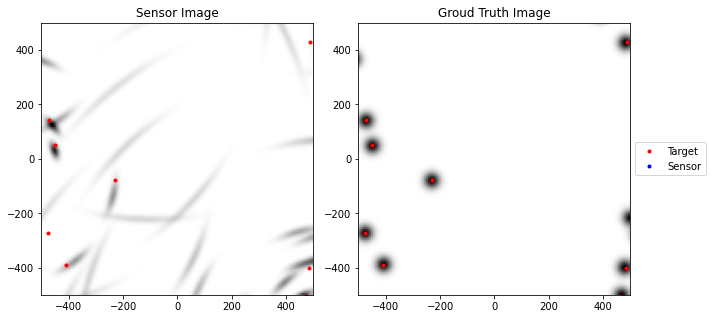

In [35]:
from matplotlib import pyplot as plt
from mtt.visualize import plot_mtt

plot_mtt(*dataset[0])
plt.show()